In [470]:
import pandas as pd
import numpy as np

# Question 1:

In [471]:
def load_data(path):
    #read_csv
    df = pd.read_csv(path,skiprows=1)
    #renaming medals 01,..
    rename_cols_names ={'Unnamed: 0':"country", '# Summer':"summer", '01 !':"summer_gold", '02 !':"summer_silver", '03 !':"summer_bronze", 'Total':"Total",
       '# Winter':"winter", '01 !.1':"winter_gold", '02 !.1':'winter_silver', '03 !.1':'winter_bronze', 'Total.1':"Total",'# Games':"games",
       '01 !.2':"total_gold", '02 !.2':"total_silver", '03 !.2':"total_bronze", 'Combined total':"combined_total"}
    df.rename(columns=rename_cols_names,inplace=True)
    #splitting country column into country name and code
    country_name = df.country.str.split("(", expand=True)[0].tolist()
    country_code = df.country.str.split("(", expand=True)[1].tolist()
    df.insert(0,column='country_name',value =country_name)
    df.insert(0,column='country_code',value=country_code)
    #setting index as country_name
    df.set_index("country_name",drop=True,inplace = True)
    #dropping older country col
    df.drop("country",1,inplace=True)
    #dropping total col
    df.drop("Total",1,inplace=True)
    #dropping totals row
    df.drop("Totals",inplace = True)
    #cleaning country code
    df.country_code = df.country_code.str.replace(')'," ")
    return df

In [472]:
df = load_data('data/olympics.csv')

In [473]:
df.head()

,country_code,summer,summer_gold,summer_silver,summer_bronze,winter,winter_gold,winter_silver,winter_bronze,games,total_gold,total_silver,total_bronze,combined_total
country_name,,,,,,,,,,,,,,
Afghanistan,AFG,13,0,0,2,0,0,0,0,13,0,0,2,2
Algeria,ALG,12,5,2,8,3,0,0,0,15,5,2,8,15
Argentina,ARG,23,18,24,28,18,0,0,0,41,18,24,28,70
Armenia,ARM,5,1,2,9,6,0,0,0,11,1,2,9,12
Australasia,ANZ [ANZ],2,3,4,5,0,0,0,0,2,3,4,5,12


# Question 2

In [474]:
def first_country(df):
    return df.iloc[0].name

In [475]:
print(first_country(df))

Afghanistan 


# Question 3

In [476]:
def gold_medal(df):
    return df.summer_gold.argmax()

In [477]:
gold_medal(df)

'United States\xc2\xa0'

# Question 4

In [478]:
def biggest_difference_in_gold_medal(df):
    return (df.summer_gold - df.winter_gold).abs().argmax()


In [479]:
biggest_difference_in_gold_medal(df)

'United States\xc2\xa0'

# Question 5

In [480]:
def get_points(df):
    points = df.total_gold * 3 + df.total_silver*2 + df.total_bronze
    df.insert(0,column='points',value =points)
    return df.points


In [481]:
get_points(df)[:50]

country_name
Afghanistan                   2
Algeria                      27
Argentina                   130
Armenia                      16
Australasia                  22
Australia                   923
Austria                     569
Azerbaijan                   43
Bahamas                      24
Bahrain                       1
Barbados                      1
Belarus                     154
Belgium                     276
Bermuda                       1
Bohemia                       5
Botswana                      2
Brazil                      184
British West Indies           2
Bulgaria                    411
Burundi                       3
Cameroon                     12
Canada                      846
Chile                        24
China                      1120
Colombia                     29
Costa Rica                    7
Ivory Coast                   2
Croatia                      67
Cuba                        420
Cyprus                        2
Czech Republic             

# Question 6

In [687]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from scipy import stats
from sklearn.cluster import KMeans
def k_means(df):
    features = ['points','summer', u'summer_gold', u'summer_silver',
       u'summer_bronze', u'winter', u'winter_gold', u'winter_silver',
       u'winter_bronze', u'games', u'total_gold', u'total_silver',
       u'total_bronze', u'combined_total']
    sse = {}

    maxK=20
    #elbow method
    for k in range(2,maxK):
        sse[k] = 0
        model = KMeans(n_clusters=k)
        model.fit(df[features])
        sse[k] += model.inertia_
    opt_k = 3
    for k in range(3,len(sse)):
        diff = sse[k] - sse[k-1]
        if diff< 0.010:
            opt_k = k
            break
        
        
    x = sse.keys()
    y = sse.values()
    plt.plot(x,y)
    plt.xlabel('k-clusters')
    plt.ylabel('Squared Sum error')
    plt.title('SSE vs k')
    plt.grid(True)
    plt.show()
    
    km = KMeans(n_clusters=opt_k)
    km.fit(df[features])
    inertia = km.inertia_
    labels = km.labels_
    
    centers = km.cluster_centers_
    plt.scatter(df['games'],df['points'],c=labels,marker='o',cmap = cm.Accent)
    plt.xlabel('Total Games')
    plt.ylabel('Points')
    plt.title('Total Games vs Points')
    plt.plot()
    
    return centers,opt_k
    

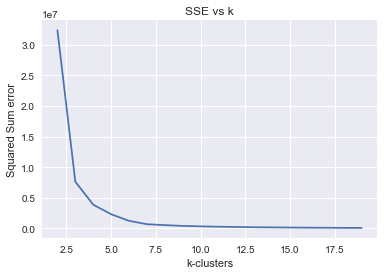

('Centers:', array([[  7.77829457e+01,   1.24806202e+01,   9.84496124e+00,
          1.20697674e+01,   1.40155039e+01,   5.15503876e+00,
          1.58914729e+00,   1.74418605e+00,   1.83720930e+00,
          1.76356589e+01,   1.14341085e+01,   1.38139535e+01,
          1.58527132e+01,   4.11007752e+01],
       [  1.19562500e+03,   1.98750000e+01,   1.60187500e+02,
          1.53812500e+02,   1.66000000e+02,   1.72500000e+01,
          4.11250000e+01,   3.94375000e+01,   3.91875000e+01,
          3.71250000e+01,   2.01312500e+02,   1.93250000e+02,
          2.05187500e+02,   5.99750000e+02],
       [  5.68400000e+03,   2.60000000e+01,   9.76000000e+02,
          7.57000000e+02,   6.66000000e+02,   2.20000000e+01,
          9.60000000e+01,   1.02000000e+02,   8.40000000e+01,
          4.80000000e+01,   1.07200000e+03,   8.59000000e+02,
          7.50000000e+02,   2.68100000e+03]]))
('K value', 3)


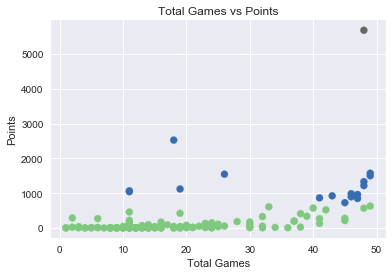

In [688]:
centers,optimal_k = k_means(df)
print("Centers:",centers)
print("K value",optimal_k)